In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Exploratory Data Analysis & Visualization

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [77]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [78]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

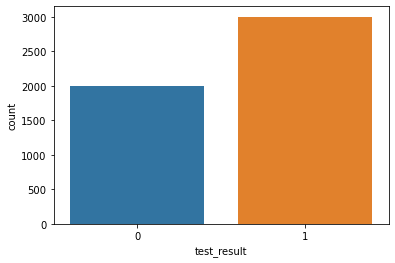

In [79]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

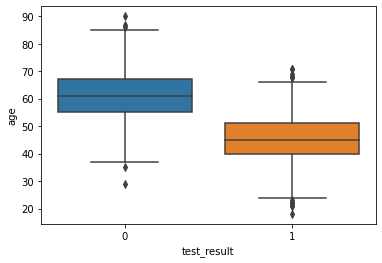

In [80]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

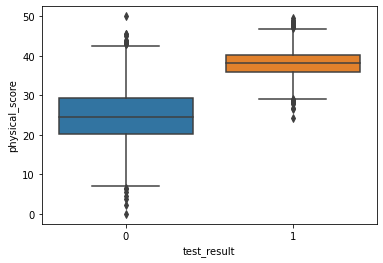

In [81]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

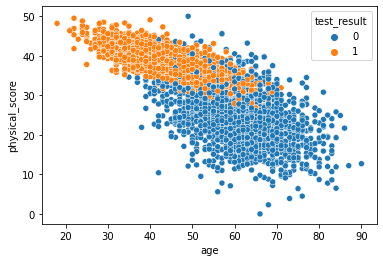

In [82]:
sns.scatterplot(x='age', y='physical_score', data=df,hue='test_result')

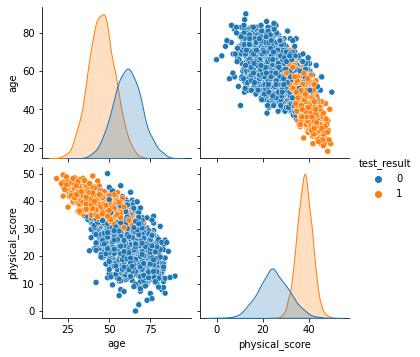

In [83]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

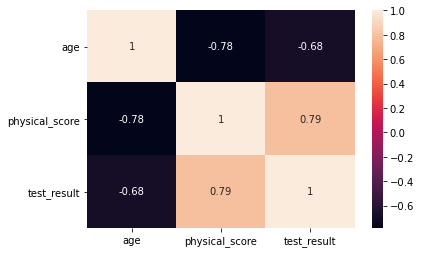

In [84]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

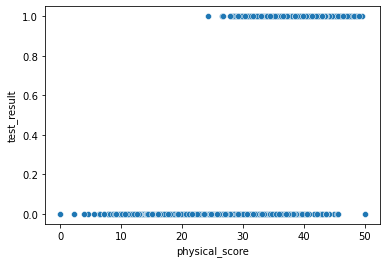

In [85]:
sns.scatterplot(x='physical_score', y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

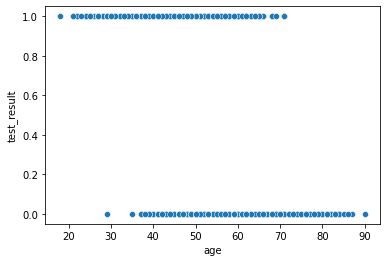

In [86]:
sns.scatterplot(x='age', y='test_result',data=df)

## X & y

In [87]:
X = df.drop('test_result', axis=1)
y= df['test_result']

In [88]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [89]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

## Train | Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [91]:
X_train

,age,physical_score
2654,52.0,27.3
2468,51.0,35.5
290,52.0,35.5
1463,43.0,37.8
4508,28.0,43.2
...,...,...
4171,71.0,16.4
599,54.0,35.7
1361,65.0,21.2
1547,83.0,24.1


In [92]:
X_test

,age,physical_score
1718,39.0,37.8
2511,45.0,38.7
345,56.0,21.8
2521,40.0,44.0
54,64.0,25.4
...,...,...
3412,40.0,42.2
4020,51.0,36.8
4635,76.0,19.4
1700,50.0,35.9


## Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
X_train

array([[ 0.02286815, -0.66613469],
       [-0.06606353,  0.34004222],
       [ 0.02286815,  0.34004222],
       ...,
       [ 1.17897998, -1.41463214],
       [ 2.77975021, -1.05878909],
       [-1.93362881,  1.17443282]])

In [95]:
X_test

array([[-1.08097817,  0.60465208],
       [-0.55352881,  0.71422873],
       [ 0.4134617 , -1.34337728],
       ...,
       [ 2.17162625, -1.63558169],
       [-0.11398767,  0.37332359],
       [-0.02607944,  0.48290025]])

## Logistic Regression Model

In [96]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [97]:
log_model.coef_

array([[-0.91653034,  3.4506941 ]])

In [98]:
log_model.intercept_

array([0.50846811])

In [29]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [106]:
type(X_train)

numpy.ndarray

In [103]:
type(y_train)

pandas.core.series.Series

In [104]:
Y_train = y_train.values

<AxesSubplot:>

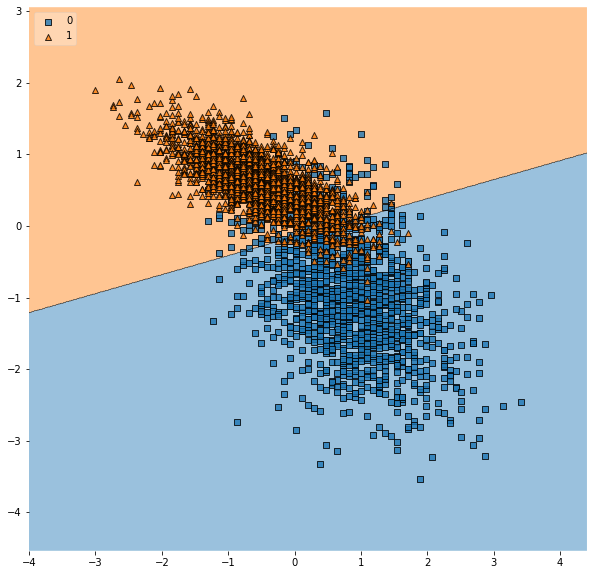

In [105]:
plt.figure(figsize=(10,10))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.astype('int'), log_model, legend=2)

## Model Performance on Classification Tasks

In [99]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test,y_pred)

0.918

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[518,  79],
       [ 44, 859]], dtype=int64)

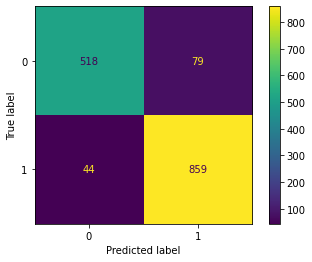

In [113]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,X_test,y_test)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       597
           1       0.92      0.95      0.93       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.92      0.92      1500



## AUC

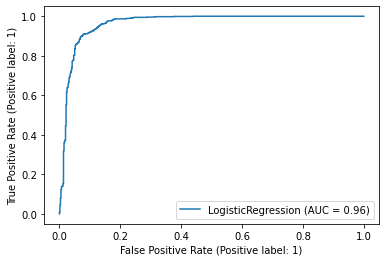

In [115]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)